# Imports and setup

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Set visual style
plt.style.use('seaborn')
sns.set_palette('viridis')

/tmp/ipykernel_13/3391195516.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Load Data

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')


## Data preview

In [4]:
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
train.shape

(18524, 9)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [7]:
test.shape

(6175, 8)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


# EDA

Text(0, 0.5, 'Count')

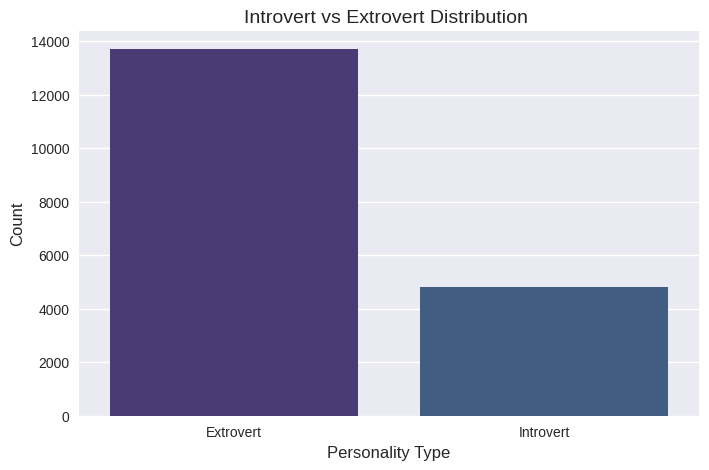

In [9]:
# Personality distribution with emoji
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Personality', data=train)
plt.title('Introvert vs Extrovert Distribution ', fontsize=14)
plt.xlabel('Personality Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [10]:
# Add percentage labels
total = len(train)
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 200
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

In [11]:
# Feature distributions with personality comparison
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, '⏳ Time Spent Alone Comparison')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


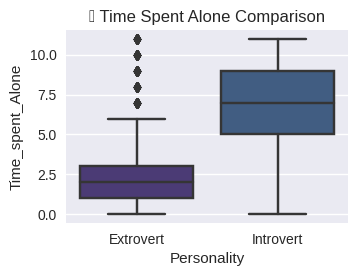

In [12]:
# Plot 1: Time spent alone
plt.subplot(2,2,1)
sns.boxplot(x='Personality', y='Time_spent_Alone', data=train)
plt.title('⏳ Time Spent Alone Comparison')

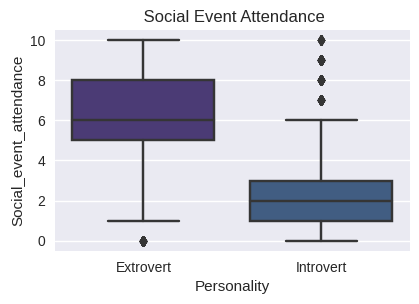

In [13]:
# Plot 2: Social events
plt.subplot(2,2,2)
sns.boxplot(x='Personality', y='Social_event_attendance', data=train)
plt.title(' Social Event Attendance')
plt.tight_layout()
plt.show()

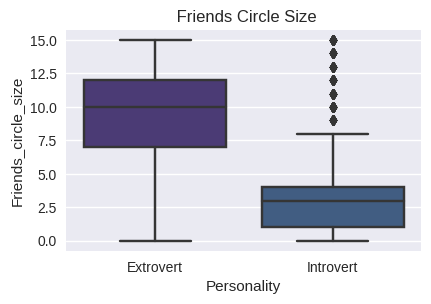

In [14]:
# Plot 3: Friends circle
plt.subplot(2,2,3)
sns.boxplot(x='Personality', y='Friends_circle_size', data=train)
plt.title(' Friends Circle Size')
plt.tight_layout()
plt.show()

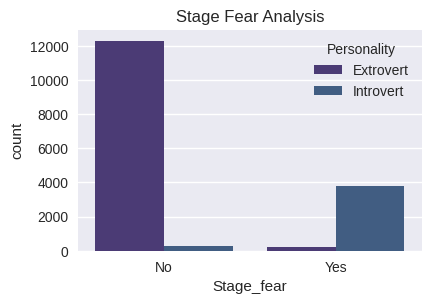

In [15]:
# Plot 4: Stage fear
plt.subplot(2,2,4)
sns.countplot(x='Stage_fear', hue='Personality', data=train)
plt.title('Stage Fear Analysis')
plt.tight_layout()
plt.show()

# 3. Clean Preprocessing

## Handle missing values properly

In [16]:
# Simple feature engineering
train['Social_Ratio'] = train['Social_event_attendance']/(train['Time_spent_Alone']+1)
test['Social_Ratio'] = test['Social_event_attendance']/(test['Time_spent_Alone']+1)


In [17]:
# First identify numerical columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [18]:
# Only fill numerical columns with median
train[num_cols] = train[num_cols].fillna(train[num_cols].median())
test[num_cols] = test[num_cols].fillna(test[num_cols].median())

In [19]:
# For categorical columns, fill with mode
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Personality')  # Exclude target variable


In [20]:
for col in cat_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)


/tmp/ipykernel_13/1422093075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)
/tmp/ipykernel_13/1422093075.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [21]:
# Verify no missing values remain
print("Missing values in train:", train.isnull().sum().sum())
print("Missing values in test:", test.isnull().sum().sum())

Missing values in train: 0
Missing values in test: 0


# Encode categoricals

In [22]:

le = LabelEncoder()
train['Drained_after_socializing'] = le.fit_transform(train['Drained_after_socializing'])
test['Drained_after_socializing'] = le.transform(test['Drained_after_socializing'])
train['Stage_fear'] = le.fit_transform(train['Stage_fear'])
test['Stage_fear'] = le.transform(test['Stage_fear'])

# Prepare data

In [23]:

X = train.drop(['id', 'Personality'], axis=1)
y = train['Personality'].map({'Introvert':0, 'Extrovert':1})
X_test = test.drop('id', axis=1)

# Scale features

In [24]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# SVC Model

In [25]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Train SVC
model = SVC(kernel='rbf', C=1.0, probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

# Evaluate

In [27]:

y_pred = model.predict(X_val)
print(f" Accuracy: {accuracy_score(y_val, y_pred):.4f}")

 Accuracy: 0.9687


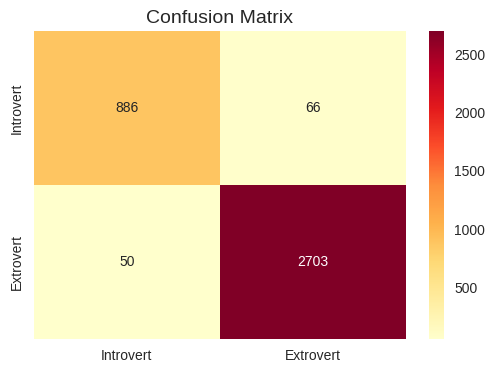

In [28]:
# Confusion matrix with style
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred), 
            annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=['Introvert', 'Extrovert'],
            yticklabels=['Introvert', 'Extrovert'])
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [29]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_val, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



# Submission with Personality

In [30]:
# Make predictions
test_preds = model.predict(X_test)
test_preds = ['Introvert' if x == 0 else 'Extrovert' for x in test_preds]


In [31]:

# Create submission
submission = pd.DataFrame({
    'id': test['id'],
    'Personality': test_preds
})

# Show sample with style
print("\n Sample Submission:")
display(submission.head(10))

# Save
submission.to_csv('submission4444.csv', index=False)


 Sample Submission:


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
5,18529,Extrovert
6,18530,Extrovert
7,18531,Introvert
8,18532,Extrovert
9,18533,Introvert
